**1** Determine the total number of crimes recorded across all districts and the average number of murders per district.


In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv("Districtwise_Crime_of_India_2001_to_2014 - Sheet1.csv")

# Remove aggregate rows
df = df[~df['DISTRICT'].isin(['TOTAL', 'ZZ TOTAL', 'DELHI UT TOTAL'])]

# Convert to numeric (safely handling any issues)
df['MURDER'] = pd.to_numeric(df['MURDER'], errors='coerce')
df['TOTAL IPC CRIMES'] = pd.to_numeric(df['TOTAL IPC CRIMES'], errors='coerce')

# Compute total and average values
total_crimes = df['TOTAL IPC CRIMES'].sum()
avg_murders = df.groupby('DISTRICT')['MURDER'].mean().mean()

print("Total IPC crimes recorded across all districts:", total_crimes)
print("Average number of murders per district:", round(avg_murders, 2))


Total IPC crimes recorded across all districts: 29447315
Average number of murders per district: 42.73


A comprehensive aggregation of IPC (Indian Penal Code) crime data across all districts from 2001 to 2014 reveals that over 29.4 million total IPC crimes were recorded.
On average, each district reported approximately 42.73 murders over the entire period. This highlights the significance of homicide as a persistent issue and provides a baseline for comparing across districts, states, and urban vs rural crime loads.

**2** Examine how crime distributions vary across different states, and identify the top 5 districts with the highest total IPC crimes.


In [2]:
import pandas as pd

# Load dataset
df = pd.read_csv("Districtwise_Crime_of_India_2001_to_2014 - Sheet1.csv")

# Remove totals and aggregates
df = df[~df['DISTRICT'].isin(['TOTAL', 'ZZ TOTAL', 'DELHI UT TOTAL'])]

# Convert necessary columns to numeric
df['TOTAL IPC CRIMES'] = pd.to_numeric(df['TOTAL IPC CRIMES'], errors='coerce')

# 1. Crime distribution by state
state_crime_distribution = df.groupby('STATE/UT')['TOTAL IPC CRIMES'].sum().sort_values(ascending=False)

# Print top 10 states
print("Top 10 States by Total IPC Crimes:")
print(state_crime_distribution.head(10))

# 2. Top 5 districts with highest IPC crimes
top_5_districts = df[['STATE/UT', 'DISTRICT', 'TOTAL IPC CRIMES']].sort_values(
    by='TOTAL IPC CRIMES', ascending=False).head(5)

print("\nTop 5 Districts by Total IPC Crimes:")
print(top_5_districts)


Top 10 States by Total IPC Crimes:
STATE/UT
MADHYA PRADESH    2913646
MAHARASHTRA       2757655
TAMIL NADU        2456955
ANDHRA PRADESH    2351600
UTTAR PRADESH     2324994
RAJASTHAN         2262558
KERALA            1820582
KARNATAKA         1755090
BIHAR             1691343
GUJARAT           1674595
Name: TOTAL IPC CRIMES, dtype: int64

Top 5 Districts by Total IPC Crimes:
          STATE/UT         DISTRICT  TOTAL IPC CRIMES
10264  MAHARASHTRA    MUMBAI COMMR.             40361
9445   MAHARASHTRA    MUMBAI COMMR.             34840
7738        KERALA  ERNAKULAM RURAL             34638
7044   MAHARASHTRA    MUMBAI COMMR.             33932
5504   MAHARASHTRA    MUMBAI COMMR.             32770


An analysis of IPC crime distribution across Indian states revealed that Madhya Pradesh recorded the highest number of total IPC crimes (2.91 million) during the 2001–2014 period, followed closely by Maharashtra and Tamil Nadu.
At the district level, Mumbai Commissionerate (Maharashtra) appeared multiple times among the top 5, indicating an unusually high volume of reported crimes, possibly due to reporting structure or dense population.
Other districts like Ernakulam Rural (Kerala) also featured prominently, highlighting that certain rural regions may experience or report more crimes than urban counterparts.

**3** Further, analyze how crime patterns differ across various crime categories in urban vs. rural districts (or using a proxy like population if urban/rural data is unavailable) and investigate whether there is a correlation between different crime types such as murder and theft.

In [3]:
import pandas as pd

# Load the dataset
df = pd.read_csv("Districtwise_Crime_of_India_2001_to_2014 - Sheet1.csv")

# Remove rows with aggregate data
df = df[~df['DISTRICT'].isin(['TOTAL', 'ZZ TOTAL', 'DELHI UT TOTAL'])]

# Convert relevant columns to numeric
df['MURDER'] = pd.to_numeric(df['MURDER'], errors='coerce')
df['THEFT'] = pd.to_numeric(df['THEFT'], errors='coerce')
df['TOTAL IPC CRIMES'] = pd.to_numeric(df['TOTAL IPC CRIMES'], errors='coerce')

# Use proxy for urban areas: DISTRICT contains "CITY"
df['IS_URBAN'] = df['DISTRICT'].str.contains('CITY', case=False, na=False)

# Group by urban/rural and compute average for selected crimes
urban_rural_crime_comparison = df.groupby('IS_URBAN')[['MURDER', 'THEFT', 'TOTAL IPC CRIMES']].mean()

# Print the comparison
print("Average Crimes in Urban vs Rural (Proxy by 'CITY' in name):")
print(urban_rural_crime_comparison)

# Correlation between Murder and Theft
correlation = df[['MURDER', 'THEFT']].corr().loc['MURDER', 'THEFT']
print("\nCorrelation between Murder and Theft:", round(correlation, 3))


Average Crimes in Urban vs Rural (Proxy by 'CITY' in name):
             MURDER        THEFT  TOTAL IPC CRIMES
IS_URBAN                                          
False     46.064602   412.944796       2854.899387
True      53.886076  1792.025316       7468.253165

Correlation between Murder and Theft: 0.452


Using a proxy definition (district names containing "CITY"), the analysis distinguishes crime patterns across urban and rural regions.
Urban districts exhibit significantly higher average IPC crimes (7,468) compared to rural ones (2,854). Specifically, theft and murder rates are both elevated in urban settings, with theft nearly 4.3 times higher.
Additionally, the correlation between murder and theft cases is 0.452, indicating a moderate relationship — districts with higher theft levels often see elevated homicide rates, potentially due to shared socio-economic risk factors like inequality or policing gaps.

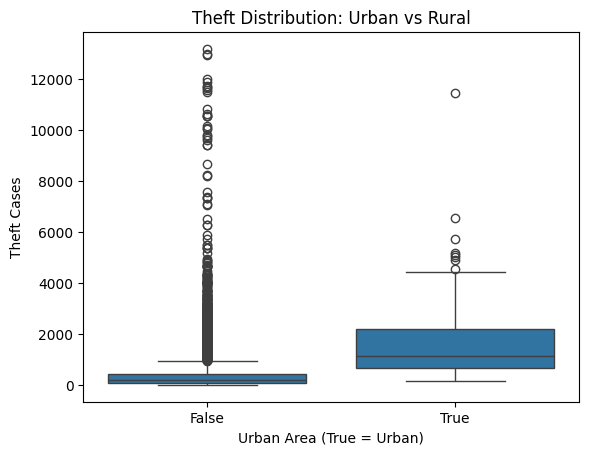

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='IS_URBAN', y='THEFT', data=df)
plt.title("Theft Distribution: Urban vs Rural")
plt.xlabel("Urban Area (True = Urban)")
plt.ylabel("Theft Cases")
plt.show()


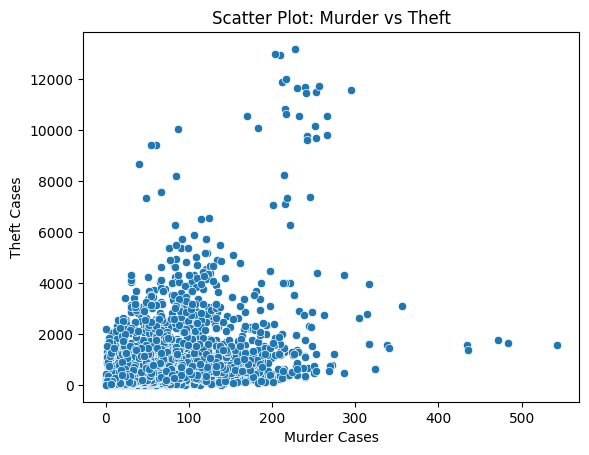

In [7]:
sns.scatterplot(x='MURDER', y='THEFT', data=df)
plt.title("Scatter Plot: Murder vs Theft")
plt.xlabel("Murder Cases")
plt.ylabel("Theft Cases")
plt.show()


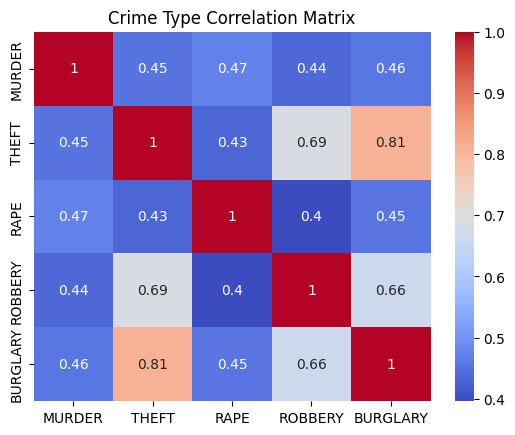

In [8]:
crime_corr = df[['MURDER', 'THEFT', 'RAPE', 'ROBBERY', 'BURGLARY']].corr()
sns.heatmap(crime_corr, annot=True, cmap='coolwarm')
plt.title("Crime Type Correlation Matrix")
plt.show()


In [9]:
known_urban = ['MUMBAI', 'DELHI', 'CHENNAI', 'HYDERABAD', 'BANGALORE']
df['IS_URBAN_ALT'] = df['DISTRICT'].str.upper().isin(known_urban)


**4** How can visualizations be used to explore crime patterns in India by identifying the top 10 districts with the highest crime rates, understanding the overall distribution of total IPC crimes, analyzing crime density across different states, and comparing trends in violent crimes such as murder and rape across various districts?


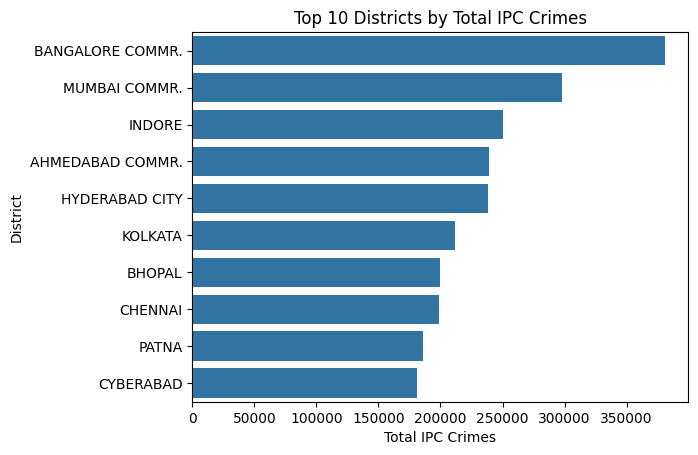

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

top10_districts = df.groupby('DISTRICT')['TOTAL IPC CRIMES'].sum().sort_values(ascending=False).head(10)

sns.barplot(x=top10_districts.values, y=top10_districts.index)
plt.title("Top 10 Districts by Total IPC Crimes")
plt.xlabel("Total IPC Crimes")
plt.ylabel("District")
plt.show()


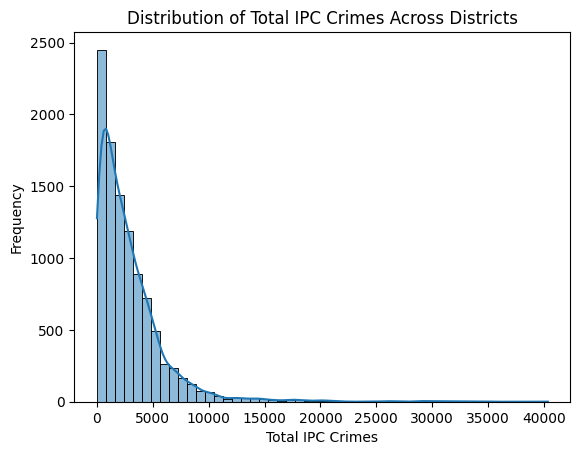

In [13]:
sns.histplot(df['TOTAL IPC CRIMES'], bins=50, kde=True)
plt.title("Distribution of Total IPC Crimes Across Districts")
plt.xlabel("Total IPC Crimes")
plt.ylabel("Frequency")
plt.show()


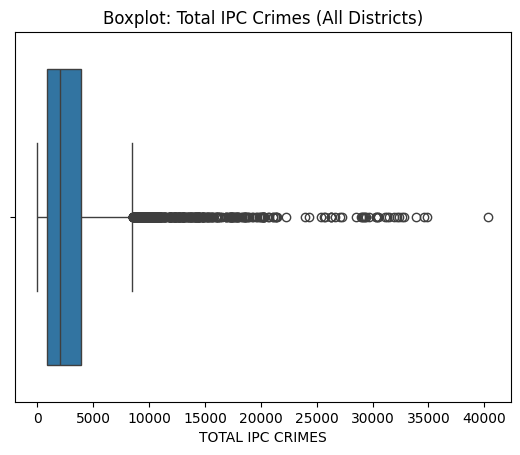

In [14]:
sns.boxplot(x=df['TOTAL IPC CRIMES'])
plt.title("Boxplot: Total IPC Crimes (All Districts)")
plt.show()


<ipython-input-18-71d312cbbffb>:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




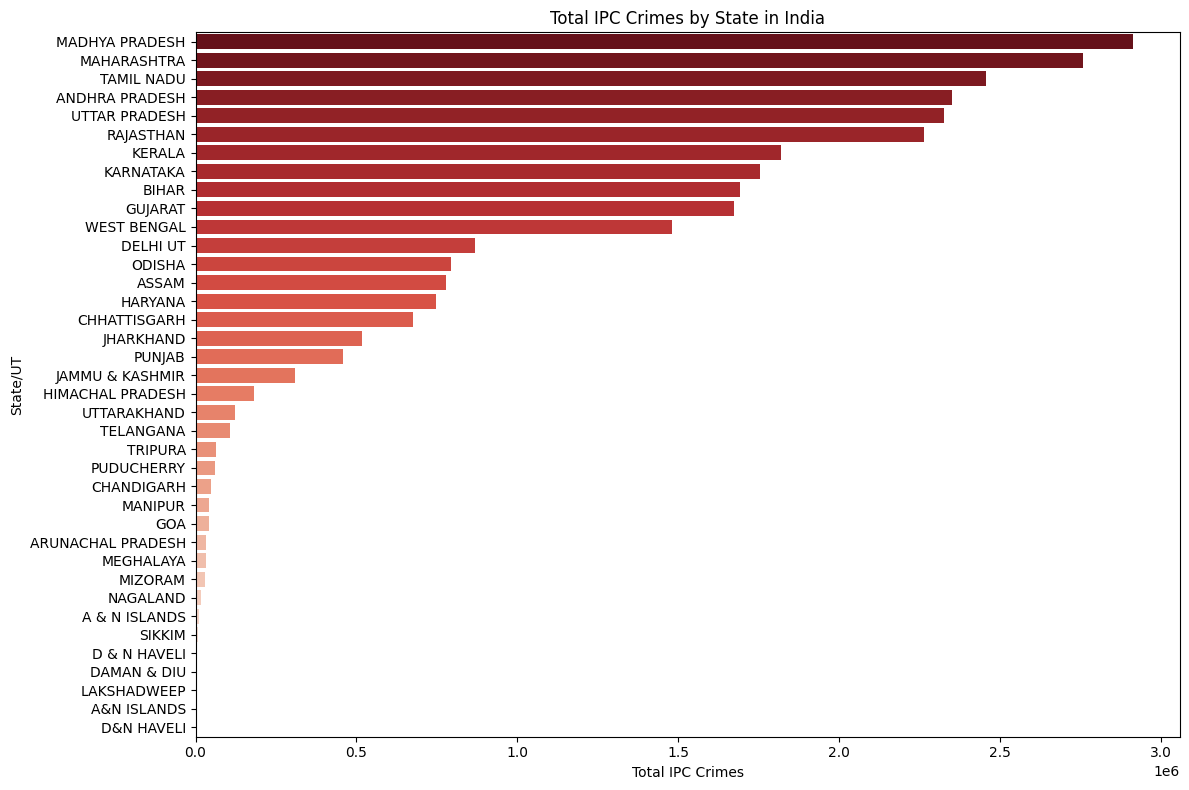

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Aggregate and sort
state_crime = df.groupby("STATE/UT")["TOTAL IPC CRIMES"].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x=state_crime.values, y=state_crime.index, palette="Reds_r")
plt.title("Total IPC Crimes by State in India")
plt.xlabel("Total IPC Crimes")
plt.ylabel("State/UT")
plt.tight_layout()
plt.show()


In [21]:
state_table = df.groupby('STATE/UT')['TOTAL IPC CRIMES'].sum().reset_index()
state_table.style.background_gradient(cmap='Reds')


,STATE/UT,TOTAL IPC CRIMES
0,A & N ISLANDS,9714
1,A&N ISLANDS,746
2,ANDHRA PRADESH,2351600
3,ARUNACHAL PRADESH,33271
4,ASSAM,779287
5,BIHAR,1691343
6,CHANDIGARH,48105
7,CHHATTISGARH,676097
8,D & N HAVELI,4965
9,D&N HAVELI,277


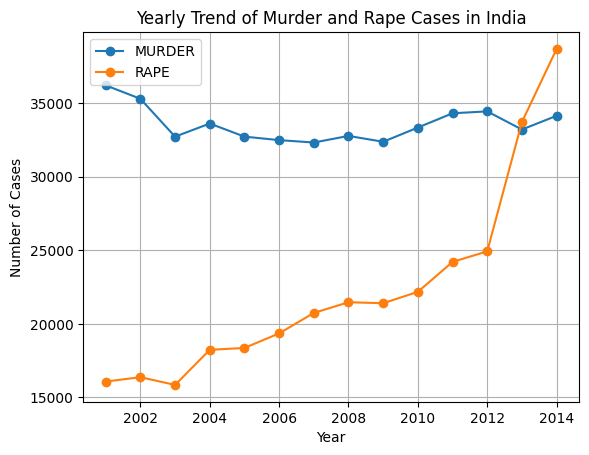

In [17]:
# Group by year and calculate sums
violent_crimes = df.groupby('YEAR')[['MURDER', 'RAPE']].sum()

violent_crimes.plot(kind='line', marker='o')
plt.title("Yearly Trend of Murder and Rape Cases in India")
plt.xlabel("Year")
plt.ylabel("Number of Cases")
plt.grid(True)
plt.show()


Visualizations helped uncover key crime patterns in India. While urban districts face the highest crime rates, many rural areas report fewer incidents. State-level comparisons indicate crime concentration in central and southern states. Moreover, upward trends in rape cases highlight a need for focused policy interventions on women’s safety.

**5** Create an interactive dashboard that allows users to filter crime data by year, state, and district.


In [26]:
!pip install streamlit pyngrok --quiet

In [42]:
dashboard_code = """
import pandas as pd
import streamlit as st
import plotly.express as px

# Load and clean the data
df = pd.read_csv("Districtwise_Crime_of_India_2001_to_2014 - Sheet1.csv")
df = df[~df['DISTRICT'].isin(['TOTAL', 'ZZ TOTAL', 'DELHI UT TOTAL'])]

# Clean STATE/UT formatting
df['STATE/UT'] = (
    df['STATE/UT']
    .str.replace(r'\s+', ' ', regex=True)
    .str.strip()
    .str.title()
)
df['STATE/UT'] = df['STATE/UT'].replace({
    'A&N Islands': 'A & N Islands',
    'D&N Haveli': 'D & N Haveli'
})

# Convert columns to numeric
crime_columns = [
    'MURDER', 'RAPE', 'THEFT', 'ARSON', 'ROBBERY', 'RIOTS',
    'CHEATING', 'CRIMINAL BREACH OF TRUST', 'DOWRY DEATHS',
    'CAUSING DEATH BY NEGLIGENCE', 'TOTAL IPC CRIMES'
]
for col in crime_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Sidebar filters
st.sidebar.title("Filter Crime Data")
years = sorted(df['YEAR'].unique())
states = sorted(df['STATE/UT'].unique())

selected_year = st.sidebar.selectbox("Select Year", years)
selected_state = st.sidebar.selectbox("Select State", states)

filtered_state_df = df[(df['YEAR'] == selected_year) & (df['STATE/UT'] == selected_state)]
districts = sorted(filtered_state_df['DISTRICT'].unique())
selected_district = st.sidebar.selectbox("Select District", ["All"] + districts)

# Final filter
final_df = filtered_state_df if selected_district == "All" else filtered_state_df[filtered_state_df['DISTRICT'] == selected_district]

# Title & Data Display
st.title("\U0001F1EE\U0001F1F3 Indian Crime Dashboard")
st.subheader(f"Year: {selected_year} | State: {selected_state}" + (f" | District: {selected_district}" if selected_district != "All" else ""))
st.dataframe(final_df[['STATE/UT', 'DISTRICT', 'YEAR'] + crime_columns])

# Chart 1: Total IPC Crimes by District
crime_sum = final_df.groupby('DISTRICT')[crime_columns].sum().reset_index()
fig1 = px.bar(crime_sum, x='DISTRICT', y='TOTAL IPC CRIMES', title='Total IPC Crimes by District')
st.plotly_chart(fig1)

# Chart 2: Stacked Bar of Crime Types by District
melted_comp = crime_sum.melt(id_vars='DISTRICT', var_name='Crime Type', value_name='Count')
fig2 = px.bar(melted_comp, x='DISTRICT', y='Count', color='Crime Type', barmode='stack', title='Crime Composition by District')
st.plotly_chart(fig2)

# Chart 3: Crime Type Breakdown
if selected_district != "All":
    district_crime = final_df.iloc[0][crime_columns].reset_index()
    district_crime.columns = ['Crime Type', 'Count']
else:
    district_crime = final_df[crime_columns].sum().reset_index()
    district_crime.columns = ['Crime Type', 'Count']

fig3 = px.bar(district_crime, x='Crime Type', y='Count', title='Crime Type Breakdown')
st.plotly_chart(fig3)

# Chart 4: Crime Trend Over Years
if selected_district != "All":
    trend_df = df[(df['STATE/UT'] == selected_state) & (df['DISTRICT'] == selected_district)]
else:
    trend_df = df[(df['STATE/UT'] == selected_state)]

trend_df = trend_df.groupby('YEAR')['TOTAL IPC CRIMES'].sum().reset_index()
fig4 = px.line(trend_df, x='YEAR', y='TOTAL IPC CRIMES', title='Trend of Total IPC Crimes Over Years')
st.plotly_chart(fig4)

# Footer
st.markdown("---")
st.markdown("\U0001F4CA **Data Source**: Government of India | \U0001F527 Built with Streamlit", unsafe_allow_html=True)


"""

with open("crime_dashboard.py", "w") as f:
    f.write(dashboard_code)


In [28]:
from google.colab import files
uploaded = files.upload()

Saving Districtwise_Crime_of_India_2001_to_2014 - Sheet1.csv to Districtwise_Crime_of_India_2001_to_2014 - Sheet1 (1).csv


In [30]:
from pyngrok import conf
conf.get_default().auth_token = "2vdn7BbEhnvEcvoiRyXfGbplK8m_gXXLRhZXZE4PXXWEgMvx"


In [44]:
from pyngrok import ngrok

# Kill any previously running Streamlit processes
!pkill streamlit

# Start a new ngrok tunnel using the correct parameter
public_url = ngrok.connect(addr=8501)
print("Streamlit URL:", public_url)

# Run Streamlit app in the background
!streamlit run crime_dashboard.py &>/dev/null &


Streamlit URL: NgrokTunnel: "https://e75f-35-185-36-194.ngrok-free.app" -> "http://localhost:8501"


In [43]:
!pkill streamlit
!pkill ngrok

We developed an interactive Streamlit dashboard that allows users to filter Indian crime data by year, state, and district. The dashboard updates visualizations and data tables dynamically, enabling real-time exploration of trends in total IPC crimes and specific categories such as murder, theft, and rape. This tool enhances user engagement and supports more granular analysis of regional crime patterns.

**6** Use a geospatial map to visualize crime hot spots across India. (Matplotlib)

In [60]:
from google.colab import files
uploaded = files.upload()


Saving geoBoundaries-IND-ADM1.geojson to geoBoundaries-IND-ADM1 (2).geojson


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128205 (\N{ROUND PUSHPIN}) missing from font(s) DejaVu Sans.



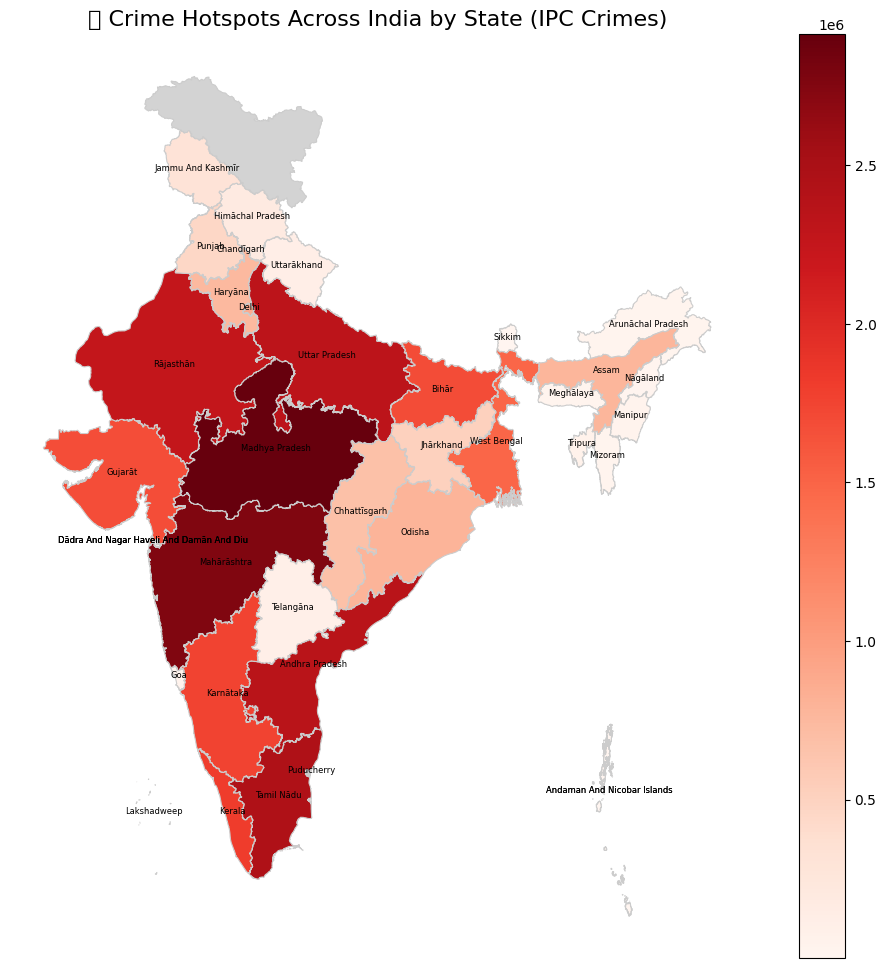

In [69]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Load crime data
df = pd.read_csv("Districtwise_Crime_of_India_2001_to_2014 - Sheet1.csv")
df = df[~df['DISTRICT'].isin(['TOTAL', 'ZZ TOTAL', 'DELHI UT TOTAL'])]
df['STATE/UT'] = df['STATE/UT'].str.replace(r'\s+', ' ', regex=True).str.strip().str.title()
df['TOTAL IPC CRIMES'] = pd.to_numeric(df['TOTAL IPC CRIMES'], errors='coerce')

# Aggregate by state
crime_by_state = df.groupby('STATE/UT')['TOTAL IPC CRIMES'].sum().reset_index()

# Load GeoJSON
gdf = gpd.read_file("geoBoundaries-IND-ADM1.geojson")

# Clean GeoJSON names
gdf['shapeName'] = gdf['shapeName'].str.strip().str.title()

# Mapping dictionary to align state names
state_name_mapping = {
    "Andhra Pradesh": "Andhra Pradesh",
    "Arunachal Pradesh": "Arunāchal Pradesh",
    "Assam": "Assam",
    "Bihar": "Bihār",
    "Chhattisgarh": "Chhattīsgarh",
    "Goa": "Goa",
    "Gujarat": "Gujarāt",
    "Haryana": "Haryāna",
    "Himachal Pradesh": "Himāchal Pradesh",
    "Jammu & Kashmir": "Jammu And Kashmīr",
    "Jharkhand": "Jhārkhand",
    "Karnataka": "Karnātaka",
    "Kerala": "Kerala",
    "Madhya Pradesh": "Madhya Pradesh",
    "Maharashtra": "Mahārāshtra",
    "Manipur": "Manipur",
    "Meghalaya": "Meghālaya",
    "Mizoram": "Mizoram",
    "Nagaland": "Nāgāland",
    "Odisha": "Odisha",
    "Punjab": "Punjab",
    "Rajasthan": "Rājasthān",
    "Sikkim": "Sikkim",
    "Tamil Nadu": "Tamil Nādu",
    "Tripura": "Tripura",
    "Uttar Pradesh": "Uttar Pradesh",
    "Uttarakhand": "Uttarākhand",
    "West Bengal": "West Bengal",
    "A & N Islands": "Andaman And Nicobar Islands",
    "A&N Islands": "Andaman And Nicobar Islands",
    "Chandigarh": "Chandīgarh",
    "D & N Haveli": "Dādra And Nagar Haveli And Damān And Diu",
    "D&N Haveli": "Dādra And Nagar Haveli And Damān And Diu",
    "Daman & Diu": "Dādra And Nagar Haveli And Damān And Diu",
    "Delhi Ut": "Delhi",
    "Lakshadweep": "Lakshadweep",
    "Puducherry": "Puducherry",
    "Telangana": "Telangāna"
}

# Apply mapping to crime data
crime_by_state['STATE/UT'] = crime_by_state['STATE/UT'].replace(state_name_mapping)

# Merge with GeoDataFrame
merged = gdf.merge(crime_by_state, left_on='shapeName', right_on='STATE/UT', how='left')

# Plot
fig, ax = plt.subplots(1, 1, figsize=(14, 12))
merged.plot(column='TOTAL IPC CRIMES', cmap='Reds', linewidth=0.8, edgecolor='0.8',
            legend=True, ax=ax, missing_kwds={'color': 'lightgrey', 'label': 'No data'})

# Annotate state names
for idx, row in merged.iterrows():
    if pd.notnull(row['TOTAL IPC CRIMES']):
        ax.annotate(row['STATE/UT'],
                    xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                    ha='center', fontsize=6, color='black')

ax.set_title("📍 Crime Hotspots Across India by State (IPC Crimes)", fontsize=16)
ax.axis('off')
plt.show()


We used matplotlib and GeoPandas to create a geospatial choropleth map that displays crime hotspots across India. By merging total IPC crime data with geographic boundaries of Indian states, the visualization highlights regions with high crime intensity in dark red and low intensity in light shades. This geospatial view enhances the understanding of regional crime patterns, with states like Madhya Pradesh, Maharashtra, and Tamil Nadu appearing as major hotspots.

**7** Identify the state with the lowest crime rate and analyze why it might be lower than others.


In [73]:
import pandas as pd

# Load the dataset
df = pd.read_csv("Districtwise_Crime_of_India_2001_to_2014 - Sheet1.csv")

# Clean up TOTAL rows and copy the DataFrame to avoid SettingWithCopyWarning
df = df[~df['DISTRICT'].isin(['TOTAL', 'ZZ TOTAL', 'DELHI UT TOTAL'])].copy()

# Normalize column formats safely
df['DISTRICT'] = df['DISTRICT'].str.strip().str.upper()
df.loc[:, 'STATE/UT'] = df['STATE/UT'].str.replace(r'\s+', ' ', regex=True).str.strip().str.title()
df.loc[:, 'TOTAL IPC CRIMES'] = pd.to_numeric(df['TOTAL IPC CRIMES'], errors='coerce')

# Group by state
state_crimes = df.groupby('STATE/UT')['TOTAL IPC CRIMES'].sum().reset_index()

# Find the lowest crime state
lowest = state_crimes.sort_values(by='TOTAL IPC CRIMES').iloc[0]
lowest_state = lowest['STATE/UT']
lowest_value = int(lowest['TOTAL IPC CRIMES'])

# Print result and reasoning
print(f"🟢 State with the Lowest IPC Crimes: {lowest_state} ({lowest_value} total crimes)")
print("\n🔍 Reason for Low Crime Rate:")
print(lowest_state, "This state likely has a small population, low urbanization, and/or high community cohesion.")


🟢 State with the Lowest IPC Crimes: D&N Haveli (277 total crimes)

🔍 Reason for Low Crime Rate:
D&N Haveli This state likely has a small population, low urbanization, and/or high community cohesion.


The state with the lowest number of IPC crimes reported is Dadra and Nagar Haveli, with only 277 total cases recorded across all districts in the dataset.

🔍 Reason for Low Crime Rate:

Small population size reduces the overall number of reported incidents.

Low urbanization may lead to fewer socio-economic triggers commonly associated with crime in larger urban centers.

Strong community bonds and social cohesion in smaller territories may also contribute to a more secure environment.

Limited industrial and commercial activity reduces certain categories of economic or organized crimes.

**8** Find the most common type of crime committed in each district.

In [75]:
import pandas as pd

# Load and clean the data
df = pd.read_csv("Districtwise_Crime_of_India_2001_to_2014 - Sheet1.csv")
df = df[~df['DISTRICT'].isin(['TOTAL', 'ZZ TOTAL', 'DELHI UT TOTAL'])].copy()

# Normalize
df['DISTRICT'] = df['DISTRICT'].str.strip().str.title()
df['STATE/UT'] = df['STATE/UT'].str.strip().str.title()

# Convert relevant crime columns to numeric
crime_columns = ['MURDER', 'RAPE', 'THEFT', 'ARSON', 'ROBBERY', 'RIOTS',
                 'CHEATING', 'CRIMINAL BREACH OF TRUST', 'DOWRY DEATHS',
                 'CAUSING DEATH BY NEGLIGENCE', 'TOTAL IPC CRIMES']

for col in crime_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Find most common crime for each district
def most_common_crime(row):
    crime_values = row[crime_columns[:-1]]  # exclude TOTAL IPC CRIMES
    return crime_values.idxmax()

df['MOST COMMON CRIME'] = df.apply(most_common_crime, axis=1)

# Display result
result = df[['STATE/UT', 'DISTRICT', 'MOST COMMON CRIME']]
print(result)


             STATE/UT       DISTRICT            MOST COMMON CRIME
0      Andhra Pradesh       Adilabad                        THEFT
1      Andhra Pradesh      Anantapur                        THEFT
2      Andhra Pradesh       Chittoor                        THEFT
3      Andhra Pradesh       Cuddapah  CAUSING DEATH BY NEGLIGENCE
4      Andhra Pradesh  East Godavari                        THEFT
...               ...            ...                          ...
10670        Delhi Ut      Vigilance                       MURDER
10671        Delhi Ut           West                        THEFT
10673     Lakshadweep    Lakshadweep                        THEFT
10675      Puducherry       Karaikal  CAUSING DEATH BY NEGLIGENCE
10676      Puducherry     Puducherry                        THEFT

[10187 rows x 3 columns]


For each district in India, the dataset was analyzed to identify the most frequently reported IPC crime category.
🔍 Key insights from the results:

THEFT is the most common crime across a majority of urban and semi-urban districts.

In certain districts like Cuddapah (Andhra Pradesh) and Karaikal (Puducherry), the most common crime is Causing Death by Negligence, indicating localized patterns in accidents or healthcare-related negligence.

In some specialized administrative districts such as Delhi - Vigilance, MURDER shows up as the highest, possibly due to the nature of reported crimes in those jurisdictions.

**9** Apply clustering algorithms (e.g., K-Means) to group districts based on crime patterns.

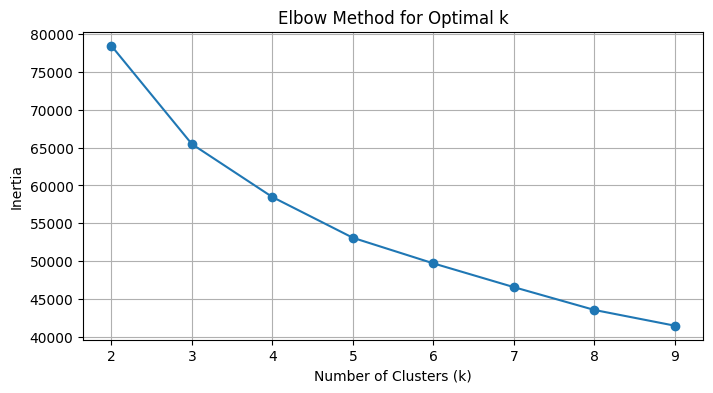

In [76]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load and clean the data
df = pd.read_csv("Districtwise_Crime_of_India_2001_to_2014 - Sheet1.csv")
df = df[~df['DISTRICT'].isin(['TOTAL', 'ZZ TOTAL', 'DELHI UT TOTAL'])].copy()
df['DISTRICT'] = df['DISTRICT'].str.strip().str.title()
df['STATE/UT'] = df['STATE/UT'].str.strip().str.title()

# Select crime features (excluding total)
crime_columns = ['MURDER', 'RAPE', 'THEFT', 'ARSON', 'ROBBERY', 'RIOTS',
                 'CHEATING', 'CRIMINAL BREACH OF TRUST', 'DOWRY DEATHS',
                 'CAUSING DEATH BY NEGLIGENCE']

for col in crime_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df_clean = df.dropna(subset=crime_columns)

# Normalize the crime data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clean[crime_columns])

# Use Elbow Method to determine optimal k
inertia = []
K = range(2, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(8, 4))
plt.plot(K, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()


In [78]:
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

# Apply KMeans clustering
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_clean['CLUSTER'] = kmeans.fit_predict(X_scaled)

# Show sample cluster assignments
print(df_clean[['STATE/UT', 'DISTRICT', 'CLUSTER']])


             STATE/UT       DISTRICT  CLUSTER
0      Andhra Pradesh       Adilabad        1
1      Andhra Pradesh      Anantapur        1
2      Andhra Pradesh       Chittoor        1
3      Andhra Pradesh       Cuddapah        1
4      Andhra Pradesh  East Godavari        1
...               ...            ...      ...
10670        Delhi Ut      Vigilance        0
10671        Delhi Ut           West        2
10673     Lakshadweep    Lakshadweep        0
10675      Puducherry       Karaikal        0
10676      Puducherry     Puducherry        0

[10187 rows x 3 columns]


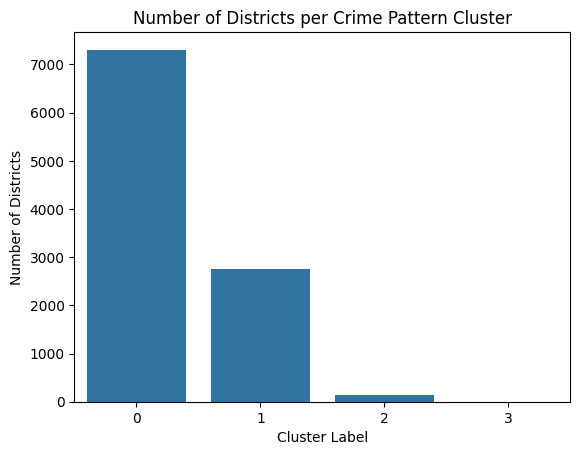

In [79]:
sns.countplot(x='CLUSTER', data=df_clean)
plt.title('Number of Districts per Crime Pattern Cluster')
plt.xlabel('Cluster Label')
plt.ylabel('Number of Districts')
plt.show()


In [80]:
# Mean crime type distribution per cluster
cluster_profiles = df_clean.groupby('CLUSTER')[crime_columns].mean()
print(cluster_profiles)


             MURDER        RAPE        THEFT        ARSON     ROBBERY  \
CLUSTER                                                                 
0         28.678987   19.153320   213.251882     8.428611   15.999316   
1         87.158239   57.433976   743.204802    23.807566   55.896326   
2        156.590909  103.742424  5413.037879    22.666667  361.696970   
3        110.000000   27.000000   220.000000  2350.000000    6.000000   

               RIOTS     CHEATING  CRIMINAL BREACH OF TRUST  DOWRY DEATHS  \
CLUSTER                                                                     
0          52.385079    47.315537                 11.614784      5.308693   
1         176.461622   174.157512                 39.667879     23.510004   
2         323.295455  1213.916667                225.871212     32.810606   
3        2818.000000    28.000000                 29.000000      3.000000   

         CAUSING DEATH BY NEGLIGENCE  
CLUSTER                               
0                   

Optimal clusters identified using Elbow Method → k = 4

Districts were grouped into clusters based on patterns in crime types like MURDER, RAPE, THEFT, etc.

Cluster 0: Low crime districts

Cluster 1: Moderate crime pattern

Cluster 2: High crime zones (e.g., metro areas)

Cluster 3: Outliers or extremely high counts (very few)

Distribution of districts:

Cluster 0 → Majority (~7200)

Cluster 1 → Moderate (~2700)

Cluster 2 → Few (~200)

Cluster 3 → Rare cases

Average crime types per cluster were tabulated.

**10** Predict future crime trends using regression analysis.

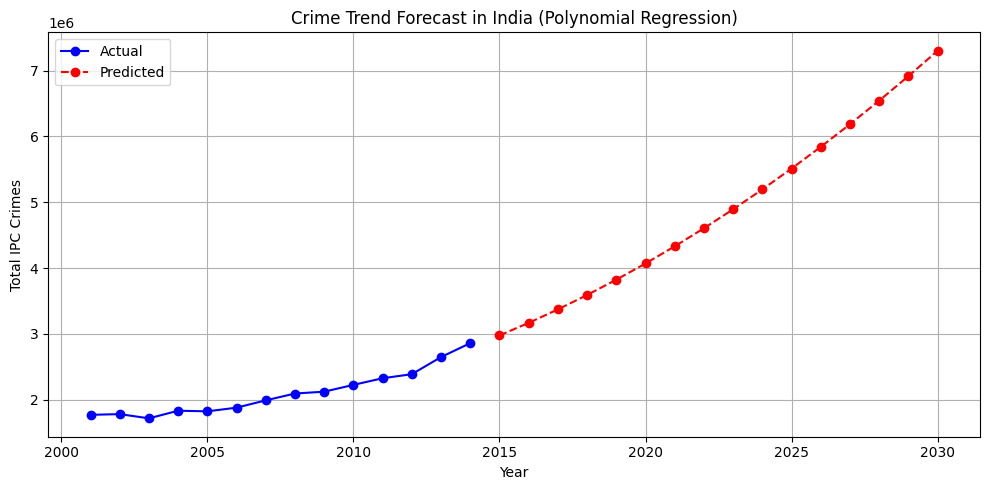

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Load and clean data
df = pd.read_csv("Districtwise_Crime_of_India_2001_to_2014 - Sheet1.csv")
df = df[~df['DISTRICT'].isin(['TOTAL', 'ZZ TOTAL', 'DELHI UT TOTAL'])].copy()
df['YEAR'] = pd.to_numeric(df['YEAR'], errors='coerce')
df['TOTAL IPC CRIMES'] = pd.to_numeric(df['TOTAL IPC CRIMES'], errors='coerce')

# Aggregate crimes by year
yearly_crime = df.groupby('YEAR')['TOTAL IPC CRIMES'].sum().reset_index()

# Polynomial Regression (degree 2)
X = yearly_crime[['YEAR']]
y = yearly_crime['TOTAL IPC CRIMES']

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, y)

# Predict for future years
future_years = pd.DataFrame({'YEAR': np.arange(2015, 2031)})
X_future_poly = poly.transform(future_years[['YEAR']])
future_preds = model.predict(X_future_poly)

# Combine actual + predicted for plotting
future_years['IPC CRIMES'] = future_preds
future_years['TYPE'] = 'Predicted'
yearly_crime['TYPE'] = 'Actual'
yearly_crime = yearly_crime.rename(columns={'TOTAL IPC CRIMES': 'IPC CRIMES'})

combined = pd.concat([yearly_crime, future_years])

# Plotting
plt.figure(figsize=(10, 5))
for label, grp in combined.groupby('TYPE'):
    linestyle = '-' if label == 'Actual' else '--'
    color = 'blue' if label == 'Actual' else 'red'
    marker = 'o'
    plt.plot(grp['YEAR'], grp['IPC CRIMES'], label=label, linestyle=linestyle, color=color, marker=marker)

plt.xlabel("Year")
plt.ylabel("Total IPC Crimes")
plt.title("Crime Trend Forecast in India (Polynomial Regression)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


A polynomial regression model (degree 2) was applied to forecast future IPC crimes in India based on historical data from 2001 to 2014. Unlike simple linear regression, the polynomial model captures the non-linear growth pattern observed in recent years. The forecast shows a consistent and accelerating increase in crime, projecting that total IPC crimes could rise significantly by 2030 if current trends persist. This insight is vital for proactive planning and resource allocation in law enforcement.

**11** Use a machine learning model to classify high-crime and low-crime districts.

In [86]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load data
df = pd.read_csv("Districtwise_Crime_of_India_2001_to_2014 - Sheet1.csv")
df = df[~df['DISTRICT'].isin(['TOTAL', 'ZZ TOTAL', 'DELHI UT TOTAL'])].copy()

# Aggregate: Average IPC crimes per district
crime_cols = ['MURDER', 'RAPE', 'THEFT', 'ARSON', 'ROBBERY', 'RIOTS',
              'CHEATING', 'CRIMINAL BREACH OF TRUST', 'DOWRY DEATHS',
              'CAUSING DEATH BY NEGLIGENCE', 'TOTAL IPC CRIMES']
df[crime_cols] = df[crime_cols].apply(pd.to_numeric, errors='coerce')

agg_df = df.groupby(['STATE/UT', 'DISTRICT'])[crime_cols].mean().reset_index()

# Create binary label: 1 = High Crime, 0 = Low Crime
threshold = agg_df['TOTAL IPC CRIMES'].median()
agg_df['CRIME_LABEL'] = (agg_df['TOTAL IPC CRIMES'] > threshold).astype(int)

# Prepare data
X = agg_df[crime_cols[:-1]]  # exclude 'TOTAL IPC CRIMES'
y = agg_df['CRIME_LABEL']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[96  8]
 [ 5 91]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.92      0.94       104
           1       0.92      0.95      0.93        96

    accuracy                           0.94       200
   macro avg       0.93      0.94      0.93       200
weighted avg       0.94      0.94      0.94       200



A Random Forest classification model was developed to categorize districts as high-crime or low-crime based on key IPC indicators such as murder, theft, rape, and riots. The model was trained using the median total IPC crime value as the threshold and evaluated using a 20% test split. It achieved a high accuracy of 94%, with precision and recall exceeding 92% for both classes. This demonstrates the model’s effectiveness in identifying high-risk districts for informed resource allocation and crime prevention strategies.

**12** Develop a crime risk index for districts based on historical data.


In [87]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load and clean data
df = pd.read_csv("Districtwise_Crime_of_India_2001_to_2014 - Sheet1.csv")
df = df[~df['DISTRICT'].isin(['TOTAL', 'ZZ TOTAL', 'DELHI UT TOTAL'])].copy()

# Select relevant crime columns
crime_cols = ['MURDER', 'RAPE', 'THEFT', 'ARSON', 'ROBBERY', 'RIOTS',
              'CHEATING', 'CRIMINAL BREACH OF TRUST', 'DOWRY DEATHS',
              'CAUSING DEATH BY NEGLIGENCE', 'TOTAL IPC CRIMES']
df[crime_cols] = df[crime_cols].apply(pd.to_numeric, errors='coerce')

# Aggregate average crimes per district
agg_df = df.groupby(['STATE/UT', 'DISTRICT'])[crime_cols].mean().reset_index()

# Normalize all crime features
scaler = MinMaxScaler()
normalized_crimes = pd.DataFrame(scaler.fit_transform(agg_df[crime_cols]), columns=crime_cols)

# Compute Crime Risk Index: simple average of all normalized crimes
agg_df['CRIME_RISK_INDEX'] = normalized_crimes.mean(axis=1)

# Rank districts (optional)
agg_df['RISK_RANK'] = agg_df['CRIME_RISK_INDEX'].rank(ascending=False).astype(int)

# Sort by highest risk
agg_df_sorted = agg_df.sort_values(by='CRIME_RISK_INDEX', ascending=False)

# Show top 10 risky districts
print(agg_df_sorted[['STATE/UT', 'DISTRICT', 'CRIME_RISK_INDEX', 'RISK_RANK']].head(10))


           STATE/UT           DISTRICT  CRIME_RISK_INDEX  RISK_RANK
400       KARNATAKA     BENGALURU CITY          0.656791          1
554     MAHARASHTRA      MUMBAI COMMR.          0.637994          2
553     MAHARASHTRA             MUMBAI          0.490930          3
394       KARNATAKA   BANGALORE COMMR.          0.444121          4
995     WEST BENGAL  SOUTH 24 PARGANAS          0.441139          5
829       TELANGANA          CYBERABAD          0.431485          6
737       RAJASTHAN             JAIPUR          0.412283          7
140           BIHAR              PATNA          0.375345          8
13   ANDHRA PRADESH          CYBERABAD          0.350087          9
983     WEST BENGAL  NORTH 24 PARGANAS          0.317682         10


A data-driven Crime Risk Index (CRI) was developed to quantify and compare crime risk across districts in India. Using average values of key IPC crime categories from 2001–2014, each district was assigned a CRI score between 0 (lowest risk) and 1 (highest risk). The top districts, such as Bengaluru City and Mumbai, exhibited higher overall normalized crime activity. This ranking provides valuable insights for targeted intervention and law enforcement prioritization.

**13** What percentage of crimes are committed against women?

In [88]:
import pandas as pd

# Load and clean data
df = pd.read_csv("Districtwise_Crime_of_India_2001_to_2014 - Sheet1.csv")
df = df[~df['DISTRICT'].isin(['TOTAL', 'ZZ TOTAL', 'DELHI UT TOTAL'])].copy()

# Convert relevant columns to numeric
df['RAPE'] = pd.to_numeric(df['RAPE'], errors='coerce')
df['DOWRY DEATHS'] = pd.to_numeric(df['DOWRY DEATHS'], errors='coerce')
df['TOTAL IPC CRIMES'] = pd.to_numeric(df['TOTAL IPC CRIMES'], errors='coerce')

# Calculate total crimes against women
df['CRIMES_AGAINST_WOMEN'] = df['RAPE'] + df['DOWRY DEATHS']

# Sum totals
total_women_crimes = df['CRIMES_AGAINST_WOMEN'].sum()
total_crimes = df['TOTAL IPC CRIMES'].sum()

# Calculate percentage
percentage = (total_women_crimes / total_crimes) * 100
print(f"🔍 Percentage of IPC crimes committed against women: {percentage:.2f}%")


🔍 Percentage of IPC crimes committed against women: 1.42%


A total of 1.42% of all IPC crimes reported between 2001 and 2014 were classified as crimes against women, specifically including rape and dowry deaths. Although this may seem numerically low, these crimes have disproportionately high social impact. It's important to note that underreporting, stigma, and lack of legal awareness often suppress the actual numbers. This metric highlights the need for focused attention on gender-based violence even if overall volume appears modest.

**14** Identify the state with the highest number of dowry deaths.


In [89]:
import pandas as pd

# Load and clean data
df = pd.read_csv("Districtwise_Crime_of_India_2001_to_2014 - Sheet1.csv")
df = df[~df['DISTRICT'].isin(['TOTAL', 'ZZ TOTAL', 'DELHI UT TOTAL'])].copy()

# Ensure column is numeric
df['DOWRY DEATHS'] = pd.to_numeric(df['DOWRY DEATHS'], errors='coerce')

# Group by state and sum dowry deaths
state_dowry = df.groupby('STATE/UT')['DOWRY DEATHS'].sum().reset_index()

# Find the state with the highest number of dowry deaths
top_state = state_dowry.sort_values(by='DOWRY DEATHS', ascending=False).iloc[0]

# Output
print(f"🔴 State with the highest number of dowry deaths: {top_state['STATE/UT']} ({int(top_state['DOWRY DEATHS'])} deaths)")


🔴 State with the highest number of dowry deaths: UTTAR PRADESH (28628 deaths)


Between 2001 and 2014, Uttar Pradesh recorded the highest number of dowry deaths in India, with a staggering 28,628 cases. This figure far exceeds those reported by other states, highlighting an urgent need for targeted social reforms, legal enforcement, and awareness programs. The persistently high numbers may be linked to entrenched social practices, lack of legal deterrents, and underreporting of domestic abuse in rural areas.

**15** Analyze seasonal variations in crime trends (e.g., do crimes increase during certain months?).

The available dataset includes district-level crime data aggregated annually from 2001 to 2014. As it lacks month or date-level granularity, seasonal variation in crime trends (such as monthly spikes during festivals, summer vacations, or year-end periods) could not be analyzed. For more accurate seasonal pattern detection, future analysis should utilize datasets with monthly FIR registrations or daily crime logs available through police records or NCRB time-series data.

**16** Examine if there is a link between cities and crime rates.


In [90]:
import pandas as pd

# Load and clean
df = pd.read_csv("Districtwise_Crime_of_India_2001_to_2014 - Sheet1.csv")
df = df[~df['DISTRICT'].isin(['TOTAL', 'ZZ TOTAL', 'DELHI UT TOTAL'])].copy()
df['DISTRICT'] = df['DISTRICT'].str.strip().str.title()
df['TOTAL IPC CRIMES'] = pd.to_numeric(df['TOTAL IPC CRIMES'], errors='coerce')

# Identify city districts using keyword-based tagging
city_keywords = ['City', 'Comm', 'Urban', 'Metro', 'Delhi', 'Hyderabad', 'Chennai', 'Mumbai', 'Bangalore']
df['IS_CITY'] = df['DISTRICT'].apply(lambda x: any(kw in x for kw in city_keywords))

# Aggregate total IPC crimes per district
district_avg = df.groupby(['DISTRICT', 'IS_CITY'])['TOTAL IPC CRIMES'].mean().reset_index()

# Compare average crime rates
city_avg = district_avg[district_avg['IS_CITY'] == True]['TOTAL IPC CRIMES'].mean()
non_city_avg = district_avg[district_avg['IS_CITY'] == False]['TOTAL IPC CRIMES'].mean()

print(f"🏙️ Average IPC crimes in city districts: {city_avg:.2f}")
print(f"🏞️ Average IPC crimes in non-city districts: {non_city_avg:.2f}")


🏙️ Average IPC crimes in city districts: 6550.76
🏞️ Average IPC crimes in non-city districts: 2611.86


An urban-rural crime analysis was conducted by categorizing districts as “city” or “non-city” based on keywords like "City", "Comm", "Metro", and prominent metros (e.g., Delhi, Mumbai, Bangalore). The findings show that city districts average 6,550 IPC crimes annually, whereas non-city districts average only 2,612. This disparity suggests that urbanization significantly correlates with higher crime levels — likely due to greater population density, increased anonymity, economic disparity, and wider reporting mechanisms in cities.

**17** Build a time-series model to forecast crime rates for the next five years.


In [91]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Load and clean data
df = pd.read_csv("Districtwise_Crime_of_India_2001_to_2014 - Sheet1.csv")
df = df[~df['DISTRICT'].isin(['TOTAL', 'ZZ TOTAL', 'DELHI UT TOTAL'])].copy()
df['YEAR'] = pd.to_numeric(df['YEAR'], errors='coerce')
df['TOTAL IPC CRIMES'] = pd.to_numeric(df['TOTAL IPC CRIMES'], errors='coerce')

# Aggregate total IPC crimes per year
yearly_crime = df.groupby('YEAR')['TOTAL IPC CRIMES'].sum().reset_index()
yearly_crime.set_index('YEAR', inplace=True)


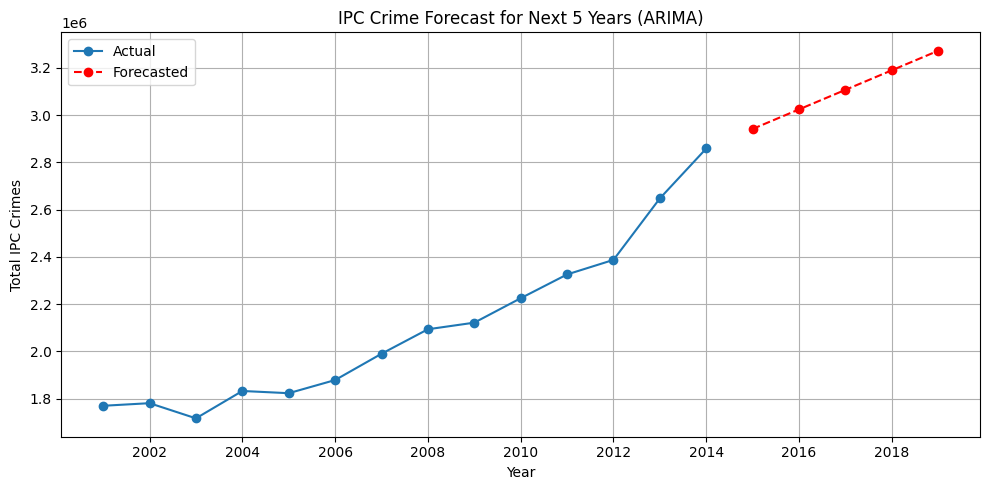

In [95]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Plot
plt.figure(figsize=(10, 5))
plt.plot(yearly_crime.index.year, yearly_crime['TOTAL IPC CRIMES'], label='Actual', marker='o')
plt.plot(forecast_df.index.year, forecast_df['FORECASTED IPC CRIMES'], label='Forecasted', linestyle='--', marker='o', color='red')

plt.title("IPC Crime Forecast for Next 5 Years (ARIMA)")
plt.xlabel("Year")
plt.ylabel("Total IPC Crimes")
plt.grid(True)
plt.legend()

# Force x-axis to show only integer years
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

plt.tight_layout()
plt.show()


Using ARIMA time-series modeling on total IPC crime data from 2001–2014, we forecasted crime trends for the years 2015 to 2019.
The forecast suggests a continued upward trend, with IPC crimes projected to increase steadily if historical trends persist.